### Bayesian Network Structure Constructed with Expert Knowledge

#### Prep training data

In [11]:
import bnlearn as bn
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset and convert for trainning
rel_path = 'bn_train_cata_data.csv'
cata_data = pd.read_csv(rel_path)
dfhot, dfnum = bn.df2onehot(cata_data)
print(dfhot)
print(dfnum)

train_num, test_num = train_test_split(dfnum, test_size=0.2)

# prep eval data
index_ref_str_list = []
for i in test_num:
    index_ref_str_list.append(i)

# it is prep in this format bc inference in bnlearn takes this format of input
test_info_dict_list = []
for i in test_num.index:
    curr_dict = {}
    for j in index_ref_str_list:
        curr_dict[j] = test_num[j][i]
    test_info_dict_list.append(curr_dict)






[df2onehot] >Auto detecting dtypes.


  0%|          | 0/17 [00:00<?, ?it/s]

100%|██████████| 17/17 [00:00<00:00, 101.19it/s]


[df2onehot] >Set dtypes in dataframe..


[df2onehot]: 100%|██████████| 17/17 [00:00<00:00, 340.00it/s]

[df2onehot] >Total onehot features: 48
      flowS1-curr_large  flowS1-curr_medium  flowS1-curr_small  \
0                 False                True              False   
1                 False                True              False   
2                 False                True              False   
3                 False                True              False   
4                 False                True              False   
...                 ...                 ...                ...   
9054              False                True              False   
9055              False                True              False   
9056              False                True              False   
9057              False                True              False   
9058              False                True              False   

      prcpS1-1day_large  prcpS1-1day_medium  prcpS1-1day_small  \
0                  True               False              False   
1                 False             

## BN structure

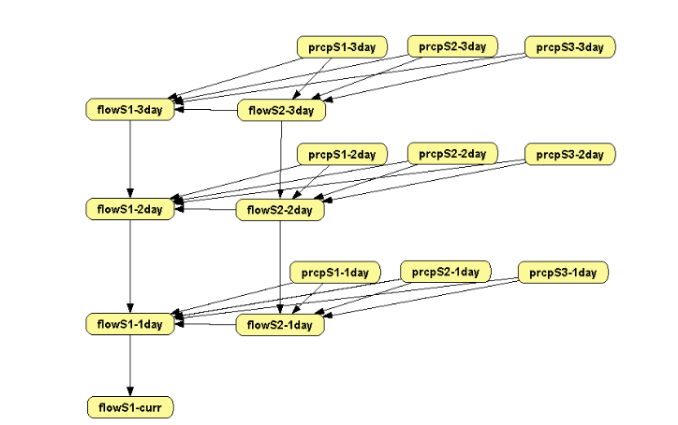

#### Construct Structure

[bnlearn] >bayes DAG created.
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


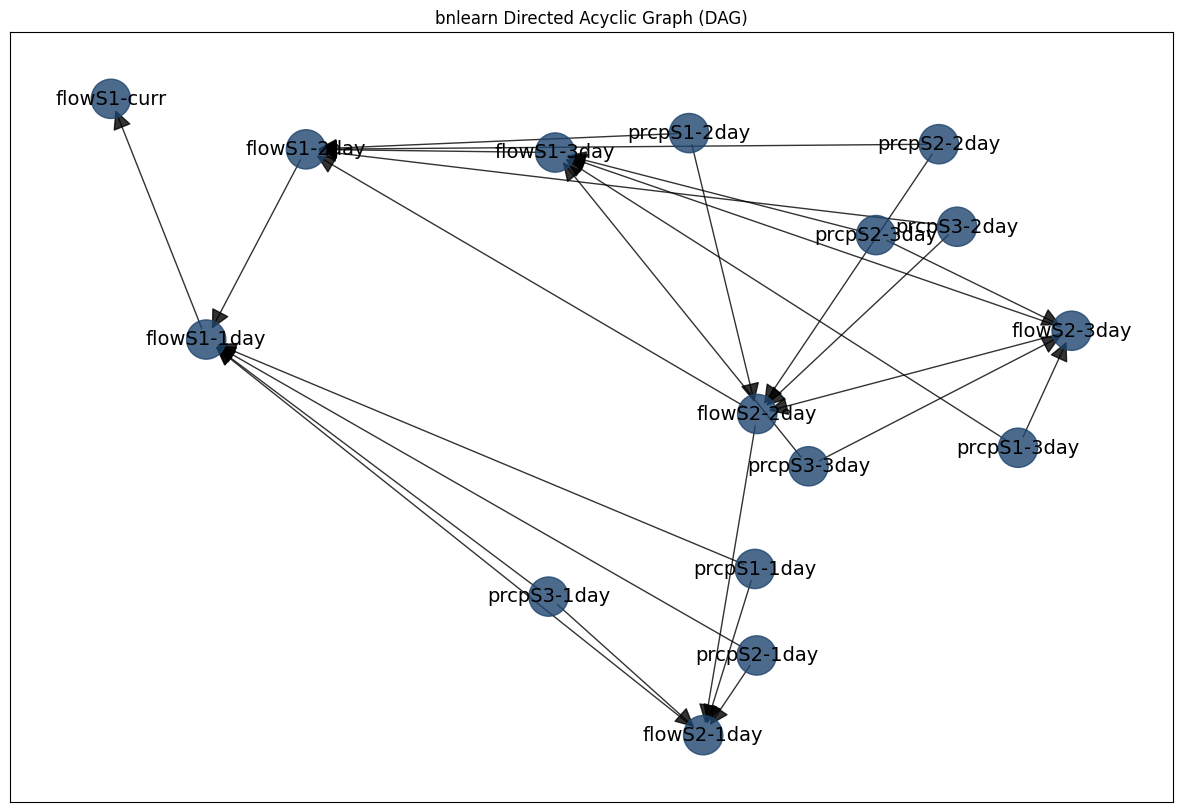

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'prcpS1-3day': array([ 0.56341976, -0.22498231]),
  'flowS1-3day': array([-0.23433582,  0.49798349]),
  'flowS2-3day': array([0.65575026, 0.06160483]),
  'prcpS2-3day': array([0.31858396, 0.29582533]),
  'prcpS3-3day': array([ 0.20235026, -0.27035152]),
  'flowS2-2day': array([ 0.1139353 , -0.14220903]),
  'flowS1-2day': array([-0.66372179,  0.5058226 ]),
  'prcpS1-2day': array([-0.00349929,  0.54558674]),
  'prcpS2-2day': array([0.42695915, 0.51843456]),
  'prcpS3-2day': array([0.45837243, 0.31627289]),
  'flowS2-1day': array([ 0.02078176, -0.92882182]),
  'flowS1-1day': array([-0.83571194,  0.04005531]),
  'prcpS1-1day': array([ 0.10983846, -0.52173269]),
  'prcpS2-1day': array([ 0.11303004, -0.73358277]),
  'prcpS3-1day': array([-0.24575255, -0.58945124]),
  'flowS1-curr': array([-1.        ,  0.62954564])},
 'G': <networkx.classes.digraph.DiGraph at 0x12702c9dc60>,
 'node_properties': 

In [12]:
model_ek_edges = [('prcpS1-3day', 'flowS1-3day'),('prcpS1-3day', 'flowS2-3day'),
                  ('prcpS2-3day', 'flowS1-3day'),('prcpS2-3day', 'flowS2-3day'),
                  ('prcpS3-3day', 'flowS1-3day'),('prcpS3-3day', 'flowS2-3day'),
                  ('flowS2-3day', 'flowS1-3day'),('flowS2-3day', 'flowS2-2day'),
                  ('flowS1-3day', 'flowS1-2day'),
                  ('prcpS1-2day', 'flowS1-2day'),('prcpS1-2day', 'flowS2-2day'),
                  ('prcpS2-2day', 'flowS1-2day'),('prcpS2-2day', 'flowS2-2day'),
                  ('prcpS3-2day', 'flowS1-2day'),('prcpS3-2day', 'flowS2-2day'),
                  ('flowS2-2day', 'flowS1-2day'),('flowS2-2day', 'flowS2-1day'),
                  ('flowS1-2day', 'flowS1-1day'),
                  ('prcpS1-1day', 'flowS1-1day'),('prcpS1-1day', 'flowS2-1day'),
                  ('prcpS2-1day', 'flowS1-1day'),('prcpS2-1day', 'flowS2-1day'),
                  ('prcpS3-1day', 'flowS1-1day'),('prcpS3-1day', 'flowS2-1day'),
                  ('flowS2-1day', 'flowS1-1day'),
                  ('flowS1-1day', 'flowS1-curr')]

DAG = bn.make_DAG(model_ek_edges)

bn.plot(DAG)

#### Model Fit 

In [13]:
# fit data into structures 

model_ek = bn.parameter_learning.fit(DAG, dfnum)


[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >CPD of prcpS1-3day:
+----------------+----------+
| prcpS1-3day(1) | 0.255029 |
+----------------+----------+
| prcpS1-3day(2) | 0.15989  |
+----------------+----------+
| prcpS1-3day(3) | 0.585081 |
+----------------+----------+
[bnlearn] >CPD of flowS1-3day:
+----------------+-----+----------------------+
| flowS2-3day    | ... | flowS2-3day(3)       |
+----------------+-----+----------------------+
| prcpS1-3day    | ... | prcpS1-3day(3)       |
+----------------+-----+----------------------+
| prcpS2-3day    | ... | prcpS2-3day(3)       |
+----------------+-----+----------------------+
| prcpS3-3day    | ... | prcpS3-3day(3)       |
+----------------+-----+----------------------+
| flowS1-3day(1) | ... | 0.002604084133574198 |
+----------------+-----+----------------------+
| flowS1-3day(2) | ... | 0.04014805776524155  |
+----------------+-----+----------------------+
| flowS1-3day(3) | ... | 0.95724785810

#### Testing Model with Test Data

In [14]:
curr_model = model_ek

model_correct_count = 0
for curr_dict in test_info_dict_list:
    curr_obs = curr_dict["flowS1-curr"] - 1 # result index is result cata -1
    print(curr_dict)
    curr_evidence_dict = curr_dict
    del curr_evidence_dict["flowS1-curr"]
    inf_result = bn.inference.fit(curr_model, variables=["flowS1-curr"], evidence=curr_evidence_dict)
    max_p_index = inf_result.df.idxmax().values[1] # this is the index of cata w/ highest p 
    curr_eval_result = max_p_index == curr_obs
    print(curr_obs)
    print(max_p_index)
    if max_p_index == curr_obs:
        model_correct_count += 1
        
model_bic_eval = model_correct_count/(len(test_info_dict_list))
print(model_bic_eval)


{'flowS1-curr': 3, 'prcpS1-1day': 1, 'prcpS2-1day': 3, 'prcpS3-1day': 1, 'flowS1-1day': 3, 'flowS2-1day': 3, 'prcpS1-2day': 2, 'prcpS2-2day': 1, 'prcpS3-2day': 2, 'flowS1-2day': 3, 'flowS2-2day': 3, 'prcpS1-3day': 3, 'prcpS2-3day': 3, 'prcpS3-3day': 3, 'flowS1-3day': 3, 'flowS2-3day': 3}
[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------------+-----------+
|    |   flowS1-curr |         p |
+====+===============+===========+
|  0 |             1 | 0.0274175 |
+----+---------------+-----------+
|  1 |             2 | 0.0486589 |
+----+---------------+-----------+
|  2 |             3 | 0.923924  |
+----+---------------+-----------+
2
2
{'flowS1-curr': 2, 'prcpS1-1day': 1, 'prcpS2-1day': 1, 'prcpS3-1day': 1, 'flowS1-1day': 3, 'flowS2-1day': 2, 'prcpS1-2day': 2, 'prcpS2-2day': 1, 'prcpS3-2day': 3, 'flowS1-2day': 3, 'flowS2-2day': 3, 'prcpS1-3day': 3, 'prcpS2-3day': 3, 'prcpS3-3day': 3, 'fl